In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data.csv')
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [16]:
df.tail(3)

,Sentence,Sentiment
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral
5841,HELSINKI AFX - KCI Konecranes said it has won ...,positive


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [4]:
df.shape

(5842, 2)

In [5]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Net sales decreased to EUR 220.5 mn from EUR 4...,neutral
freq,2,3130


## Handling duplicate values

In [6]:
df.duplicated().sum()

np.int64(6)

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [9]:
df['Sentiment'].value_counts()

Sentiment
neutral     3124
positive    1852
negative     860
Name: count, dtype: int64

In [10]:
X = df['Sentence']
y = df['Sentiment']

<Axes: xlabel='Sentiment', ylabel='count'>

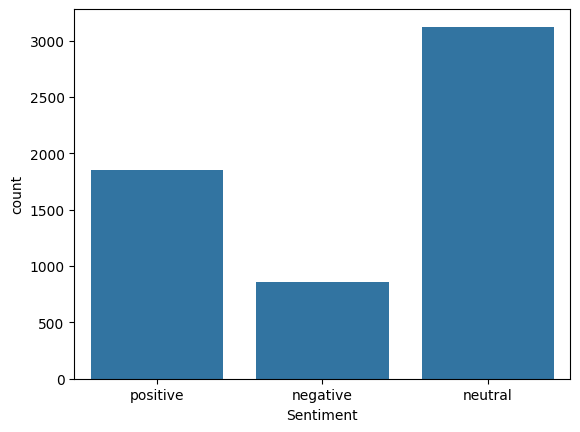

In [13]:
sns.countplot(data=df,x=y)

## Text Preprocessing

In [17]:
import re
import string
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [20]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and stem
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    # Join back to string
    return ' '.join(tokens)

In [22]:
df['clean_text'] = df['Sentence'].apply(preprocess_text)

df.head()

,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,positive,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubl eurm eu...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerc major co...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remain percent stake ...


## Handling Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

# Assuming your sentiment column is named 'Sentiment'
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

# Check mapping
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Label Mapping: {'negative': np.int64(0), 'neutral': np.int64(1), 'positive': np.int64(2)}


In [25]:
df.head()

,Sentence,Sentiment,clean_text
0,The GeoSolutions technology will leverage Bene...,2,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter componenta net sale doubl eurm eu...
3,According to the Finnish-Russian Chamber of Co...,1,accord finnishrussian chamber commerc major co...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remain percent stake ...


## Tokenization, Vectorization and Training the ML models

## Training ( ML Approach )


========== Logistic Regression ==========

Fold 1 CV Accuracy: 0.6981
Fold 2 CV Accuracy: 0.6724
Fold 3 CV Accuracy: 0.6724
Fold 4 CV Accuracy: 0.6785
Fold 5 CV Accuracy: 0.6645
Mean CV Accuracy: 0.6772
------------------------------------------------------------
Logistic Regression Test Accuracy: 0.7012
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.54      0.46       172
           1       0.80      0.75      0.77       625
           2       0.74      0.70      0.72       371

    accuracy                           0.70      1168
   macro avg       0.65      0.66      0.65      1168
weighted avg       0.72      0.70      0.71      1168



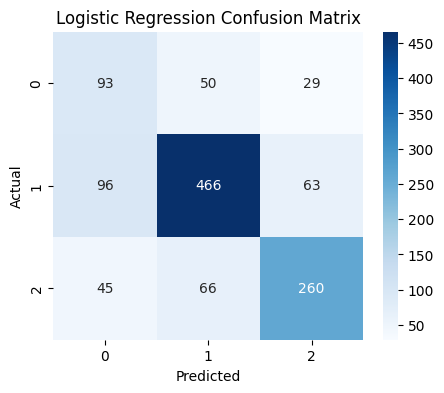



========== Linear SVC ==========

Fold 1 CV Accuracy: 0.6756
Fold 2 CV Accuracy: 0.6456
Fold 3 CV Accuracy: 0.6660
Fold 4 CV Accuracy: 0.6495
Fold 5 CV Accuracy: 0.6570
Mean CV Accuracy: 0.6587
------------------------------------------------------------
Linear SVC Test Accuracy: 0.6764
Linear SVC Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.33      0.33       172
           1       0.75      0.75      0.75       625
           2       0.72      0.72      0.72       371

    accuracy                           0.68      1168
   macro avg       0.60      0.60      0.60      1168
weighted avg       0.68      0.68      0.68      1168



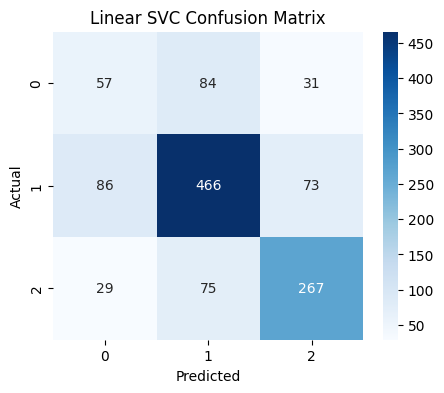



========== Decision Tree ==========

Fold 1 CV Accuracy: 0.5578
Fold 2 CV Accuracy: 0.5418
Fold 3 CV Accuracy: 0.5782
Fold 4 CV Accuracy: 0.5520
Fold 5 CV Accuracy: 0.5584
Mean CV Accuracy: 0.5576
------------------------------------------------------------
Decision Tree Test Accuracy: 0.5582
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.29      0.24       172
           1       0.68      0.60      0.64       625
           2       0.62      0.61      0.62       371

    accuracy                           0.56      1168
   macro avg       0.50      0.50      0.50      1168
weighted avg       0.59      0.56      0.57      1168



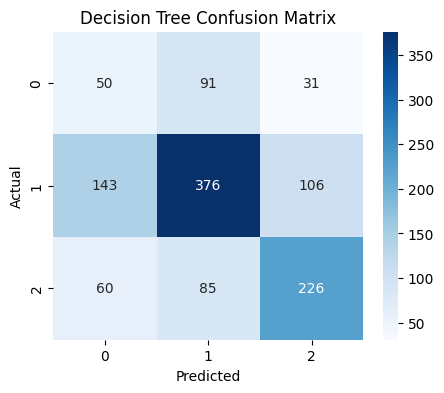



========== Random Forest ==========

Fold 1 CV Accuracy: 0.6510
Fold 2 CV Accuracy: 0.6317
Fold 3 CV Accuracy: 0.6520
Fold 4 CV Accuracy: 0.6324
Fold 5 CV Accuracy: 0.6334
Mean CV Accuracy: 0.6401
------------------------------------------------------------
Random Forest Test Accuracy: 0.6592
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.17      0.20       172
           1       0.68      0.81      0.74       625
           2       0.76      0.63      0.69       371

    accuracy                           0.66      1168
   macro avg       0.56      0.54      0.55      1168
weighted avg       0.65      0.66      0.65      1168



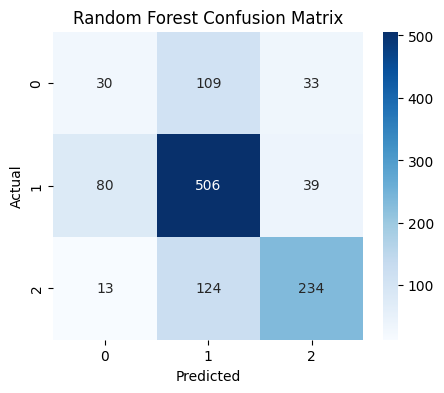



========== Naive Bayes ==========

Fold 1 CV Accuracy: 0.6756
Fold 2 CV Accuracy: 0.6681
Fold 3 CV Accuracy: 0.6670
Fold 4 CV Accuracy: 0.6635
Fold 5 CV Accuracy: 0.6945
Mean CV Accuracy: 0.6737
------------------------------------------------------------
Naive Bayes Test Accuracy: 0.6858
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.05      0.10       172
           1       0.69      0.93      0.79       625
           2       0.69      0.56      0.62       371

    accuracy                           0.69      1168
   macro avg       0.65      0.52      0.50      1168
weighted avg       0.67      0.69      0.63      1168



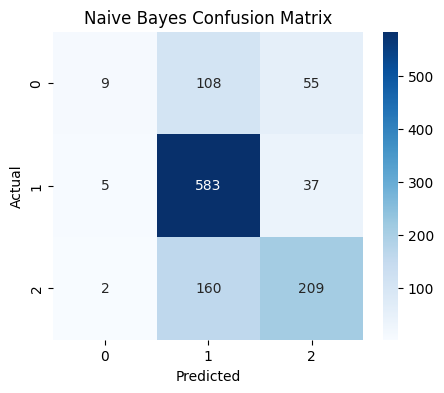

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 1. Split dataset into train/test
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['Sentiment'],
    test_size=0.2, random_state=42, stratify=df['Sentiment']
)

# ===============================
# 2. TF-IDF Vectorization
# ===============================
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===============================
# 3. Define models with class imbalance handling
# ===============================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Linear SVC": LinearSVC(max_iter=10000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    "Naive Bayes": MultinomialNB()
}

# ===============================
# 4. Stratified K-Fold CV + Final Evaluation
# ===============================
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n{'='*10} {name} {'='*10}\n")
    
    fold_accuracies = []

    # Stratified K-Fold CV on training set
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_tfidf, y_train), 1):
        X_fold_train, X_fold_val = X_train_tfidf[train_idx], X_train_tfidf[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_val_pred = model.predict(X_fold_val)
        acc = accuracy_score(y_fold_val, y_val_pred)
        fold_accuracies.append(acc)
        print(f"Fold {fold} CV Accuracy: {acc:.4f}")

    print(f"Mean CV Accuracy: {np.mean(fold_accuracies):.4f}\n{'-'*60}")

    # Train final model on full training data
    model.fit(X_train_tfidf, y_train)

    # Evaluate on test set
    y_pred = model.predict(X_test_tfidf)
    test_acc = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n" + "="*80)
